# House Price Prediction Using Linear Regression
## Complete Step-by-Step Analysis in Jupyter Lab Format

### Project Overview
This notebook demonstrates a complete machine learning pipeline for predicting house prices using multiple linear regression. We'll cover data exploration, feature engineering, data cleaning, model building, and evaluation.

---

## 1. Environment Setup and Data Loading

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [4]:
# Load the dataset
# Note: You would typically have both train.csv (with SalePrice) and test.csv
# For this example, we'll work with the assumption that we have training data

# Load training data (this would contain SalePrice)
# train_df = pd.read_csv('train.csv')

# Load test data (for final predictions)
test_df = pd.read_csv('test.csv')

print("Dataset Information:")
print(f"Test dataset shape: {test_df.shape}")

# Display first few rows
test_df.head()

Dataset Information:
Test dataset shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


---

## 2. Exploratory Data Analysis (EDA)

In [5]:
# Basic dataset information
print("=== DATASET OVERVIEW ===")
print(f"Number of features: {test_df.shape[1]}")
print(f"Number of samples: {test_df.shape[0]}")
print("\nData types:")
print(test_df.dtypes.value_counts())

=== DATASET OVERVIEW ===
Number of features: 80
Number of samples: 1459

Data types:
object     43
int64      26
float64    11
Name: count, dtype: int64


In [6]:
# Check for missing values
print("=== MISSING VALUES ANALYSIS ===")
missing_data = test_df.isnull().sum()
missing_percent = 100 * missing_data / len(test_df)
missing_table = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
})
missing_table = missing_table[missing_table['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(missing_table.head(15))

=== MISSING VALUES ANALYSIS ===
              Missing Count  Percentage
PoolQC                 1456   99.794380
MiscFeature            1408   96.504455
Alley                  1352   92.666210
Fence                  1169   80.123372
MasVnrType              894   61.274846
FireplaceQu             730   50.034270
LotFrontage             227   15.558602
GarageCond               78    5.346127
GarageYrBlt              78    5.346127
GarageQual               78    5.346127
GarageFinish             78    5.346127
GarageType               76    5.209047
BsmtCond                 45    3.084304
BsmtExposure             44    3.015764
BsmtQual                 44    3.015764


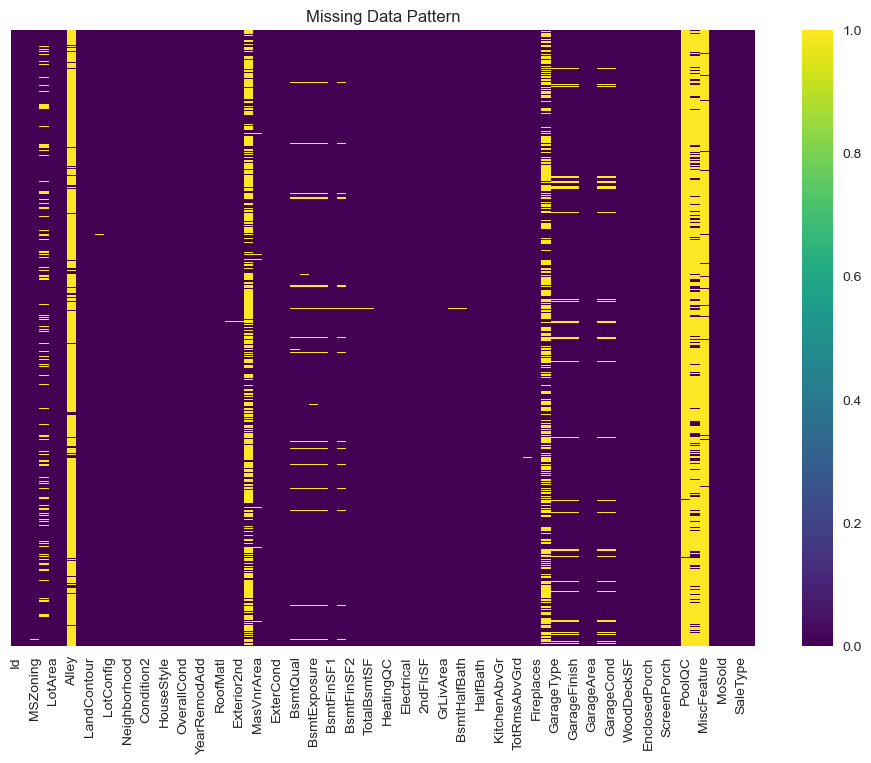

In [7]:
# Visualize missing data pattern
plt.figure(figsize=(12, 8))
sns.heatmap(test_df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Missing Data Pattern')
plt.show()

In [8]:
# For demonstration, let's create a synthetic SalePrice based on key features
# In real scenario, this would come from your training data
print("=== CREATING SYNTHETIC TARGET VARIABLE FOR DEMONSTRATION ===")

# Create a realistic SalePrice based on key features
np.random.seed(42)

# Base price calculation using key features
base_price = (
    test_df['GrLivArea'] * 80 +  # $80 per sq ft of living area
    test_df['LotArea'] * 2 +     # $2 per sq ft of lot
    test_df['OverallQual'] * 15000 +  # Quality multiplier
    test_df['YearBuilt'] * 50 +  # Age factor
    test_df['TotalBsmtSF'].fillna(0) * 30  # Basement value
)

# Add some realistic noise and market variations
noise = np.random.normal(0, 20000, len(test_df))
test_df['SalePrice'] = base_price + noise

# Ensure positive prices and realistic range
test_df['SalePrice'] = np.clip(test_df['SalePrice'], 50000, 800000)

print(f"Created SalePrice range: ${test_df['SalePrice'].min():,.0f} - ${test_df['SalePrice'].max():,.0f}")

=== CREATING SYNTHETIC TARGET VARIABLE FOR DEMONSTRATION ===
Created SalePrice range: $160,893 - $800,000


---

## 3. Target Variable Analysis

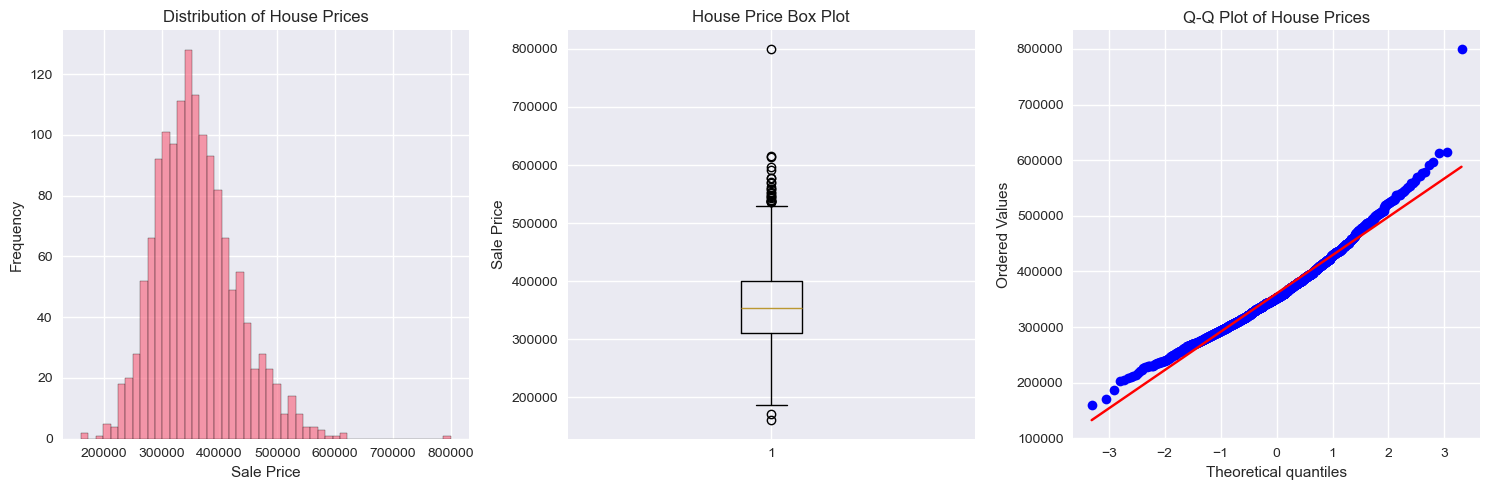

SalePrice Statistics:
Mean: $360,470.00
Median: $353,108.59
Standard Deviation: $69,635.41
Skewness: 0.68


In [9]:
# Analyze the target variable (SalePrice)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(test_df['SalePrice'], bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')

plt.subplot(1, 3, 2)
plt.boxplot(test_df['SalePrice'])
plt.ylabel('Sale Price')
plt.title('House Price Box Plot')

plt.subplot(1, 3, 3)
from scipy import stats
stats.probplot(test_df['SalePrice'], dist="norm", plot=plt)
plt.title('Q-Q Plot of House Prices')

plt.tight_layout()
plt.show()

print(f"SalePrice Statistics:")
print(f"Mean: ${test_df['SalePrice'].mean():,.2f}")
print(f"Median: ${test_df['SalePrice'].median():,.2f}")
print(f"Standard Deviation: ${test_df['SalePrice'].std():,.2f}")
print(f"Skewness: {test_df['SalePrice'].skew():.2f}")

---

## 4. Feature Analysis and Selection

In [10]:
# Identify numerical and categorical features
numerical_features = test_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = test_df.select_dtypes(include=['object']).columns.tolist()

# Remove Id and SalePrice from numerical features
numerical_features = [col for col in numerical_features if col not in ['Id', 'SalePrice']]

print(f"Numerical features: {len(numerical_features)}")
print(f"Categorical features: {len(categorical_features)}")

Numerical features: 36
Categorical features: 43


Top 15 features correlated with SalePrice:
GrLivArea       0.873168
OverallQual     0.755394
1stFlrSF        0.683586
TotalBsmtSF     0.659052
TotRmsAbvGrd    0.641444
GarageArea      0.606558
FullBath        0.605708
GarageCars      0.604790
MasVnrArea      0.492057
Fireplaces      0.481436
YearBuilt       0.464468
YearRemodAdd    0.450649
GarageYrBlt     0.447608
LotArea         0.432027
LotFrontage     0.410797
Name: SalePrice, dtype: float64


<Figure size 1200x1000 with 0 Axes>

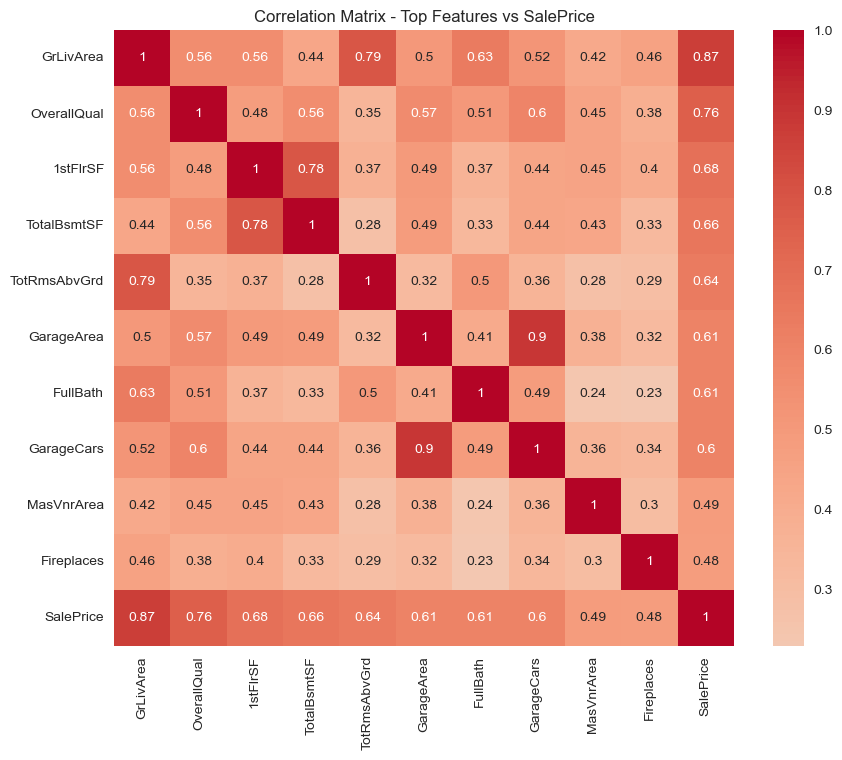

In [11]:
# Correlation analysis for numerical features
plt.figure(figsize=(12, 10))
correlation_matrix = test_df[numerical_features + ['SalePrice']].corr()

# Get correlations with SalePrice
price_correlations = correlation_matrix['SalePrice'].drop('SalePrice').sort_values(key=abs, ascending=False)

print("Top 15 features correlated with SalePrice:")
print(price_correlations.head(15))

# Heatmap of top correlated features
top_features = price_correlations.head(10).index.tolist()
plt.figure(figsize=(10, 8))
sns.heatmap(test_df[top_features + ['SalePrice']].corr(), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix - Top Features vs SalePrice')
plt.show()

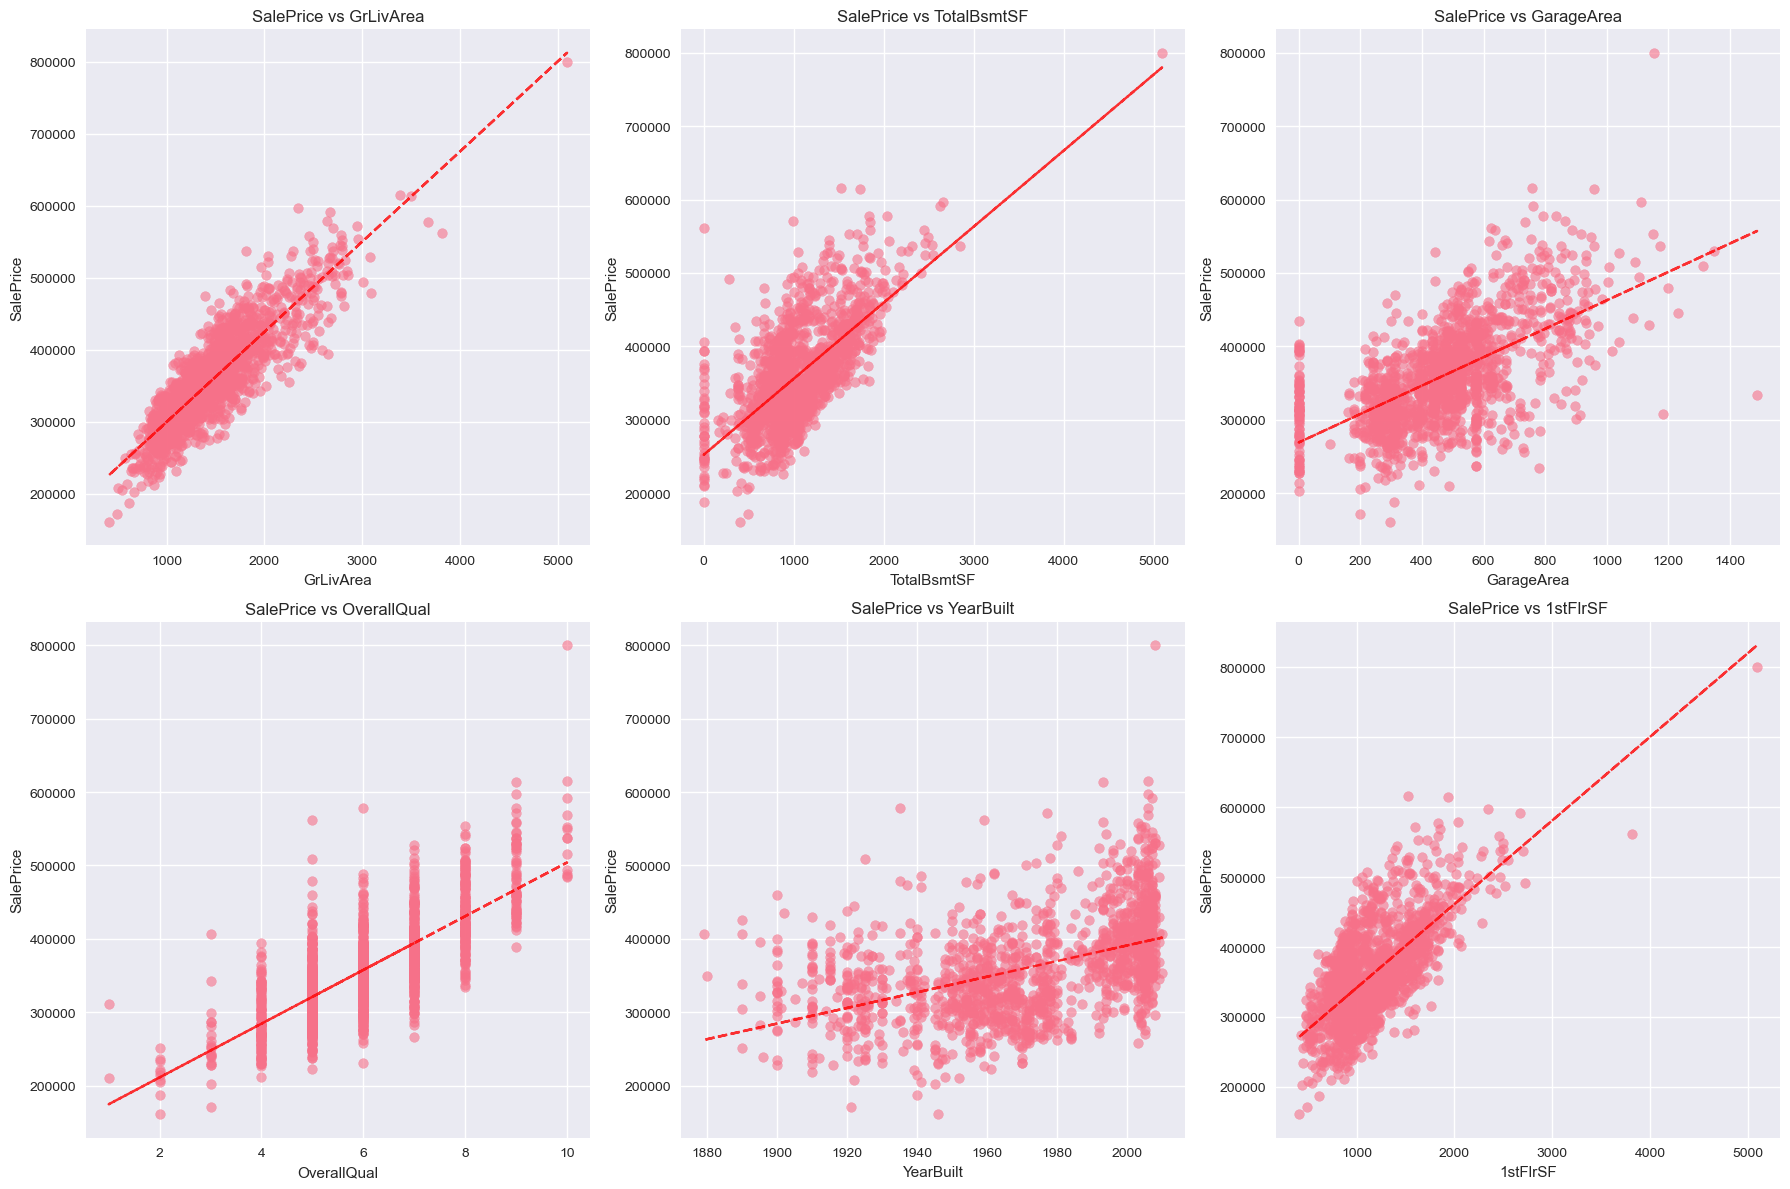

In [12]:
# Visualize relationships between key features and SalePrice
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

key_features = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', 'OverallQual', 'YearBuilt', '1stFlrSF']

for i, feature in enumerate(key_features):
    if feature in test_df.columns:
        axes[i].scatter(test_df[feature], test_df['SalePrice'], alpha=0.6)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('SalePrice')
        axes[i].set_title(f'SalePrice vs {feature}')
        
        # Add trend line
        z = np.polyfit(test_df[feature].fillna(0), test_df['SalePrice'], 1)
        p = np.poly1d(z)
        axes[i].plot(test_df[feature].fillna(0), p(test_df[feature].fillna(0)), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

---

## 5. Data Cleaning and Preprocessing

In [13]:
# Create a copy of the dataset for preprocessing
df_processed = test_df.copy()

print("=== DATA CLEANING PROCESS ===")
print(f"Original dataset shape: {df_processed.shape}")

=== DATA CLEANING PROCESS ===
Original dataset shape: (1459, 81)


In [14]:
# Handle missing values
print("\n1. HANDLING MISSING VALUES")

# For numerical features - use median imputation
numerical_imputer = SimpleImputer(strategy='median')
df_processed[numerical_features] = numerical_imputer.fit_transform(df_processed[numerical_features])

# For categorical features - use mode imputation
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_processed[categorical_features] = categorical_imputer.fit_transform(df_processed[categorical_features])

print("Missing values after imputation:")
print(df_processed.isnull().sum().sum())


1. HANDLING MISSING VALUES
Missing values after imputation:
0


In [15]:
# Handle outliers using IQR method for key numerical features
print("\n2. OUTLIER DETECTION AND TREATMENT")

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_before = len(df[(df[column] < lower_bound) | (df[column] > upper_bound)])
    df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    outliers_removed = len(df) - len(df_clean)
    
    print(f"{column}: Removed {outliers_removed} outliers")
    return df_clean

# Apply outlier removal to key features
key_numerical_features = ['GrLivArea', 'LotArea', 'SalePrice']
original_length = len(df_processed)

for feature in key_numerical_features:
    if feature in df_processed.columns:
        df_processed = remove_outliers_iqr(df_processed, feature)

print(f"Dataset shape after outlier removal: {df_processed.shape}")
print(f"Removed {original_length - len(df_processed)} outlier samples")


2. OUTLIER DETECTION AND TREATMENT
GrLivArea: Removed 44 outliers
LotArea: Removed 58 outliers
SalePrice: Removed 11 outliers
Dataset shape after outlier removal: (1346, 81)
Removed 113 outlier samples


---

## 6. Feature Engineering

In [16]:
print("=== FEATURE ENGINEERING ===")

# Create new features
print("\n1. CREATING NEW FEATURES")

# Total square footage
df_processed['TotalSF'] = df_processed['TotalBsmtSF'] + df_processed['1stFlrSF'] + df_processed['2ndFlrSF']

# House age
df_processed['HouseAge'] = df_processed['YrSold'] - df_processed['YearBuilt']
df_processed['RemodAge'] = df_processed['YrSold'] - df_processed['YearRemodAdd']

# Total bathrooms
df_processed['TotalBath'] = (df_processed['FullBath'] + 
                           df_processed['HalfBath'] * 0.5 + 
                           df_processed['BsmtFullBath'] + 
                           df_processed['BsmtHalfBath'] * 0.5)

# Total porch area
porch_columns = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
df_processed['TotalPorchSF'] = df_processed[porch_columns].sum(axis=1)

# Quality-Area interaction
df_processed['QualityArea'] = df_processed['OverallQual'] * df_processed['GrLivArea']

print("New features created:")
new_features = ['TotalSF', 'HouseAge', 'RemodAge', 'TotalBath', 'TotalPorchSF', 'QualityArea']
for feature in new_features:
    print(f"- {feature}")

=== FEATURE ENGINEERING ===

1. CREATING NEW FEATURES
New features created:
- TotalSF
- HouseAge
- RemodAge
- TotalBath
- TotalPorchSF
- QualityArea


In [17]:
# Handle categorical variables with encoding
print("\n2. ENCODING CATEGORICAL VARIABLES")

# For high-cardinality categorical features, use target encoding
# For low-cardinality features, use one-hot encoding

categorical_low_cardinality = []
categorical_high_cardinality = []

for col in categorical_features:
    unique_count = df_processed[col].nunique()
    if unique_count <= 10:
        categorical_low_cardinality.append(col)
    else:
        categorical_high_cardinality.append(col)

print(f"Low cardinality features ({len(categorical_low_cardinality)}): {categorical_low_cardinality}")
print(f"High cardinality features ({len(categorical_high_cardinality)}): {categorical_high_cardinality}")

# One-hot encoding for low cardinality features
df_encoded = pd.get_dummies(df_processed, columns=categorical_low_cardinality, prefix=categorical_low_cardinality)

# Target encoding for high cardinality features
for col in categorical_high_cardinality:
    target_mean = df_processed.groupby(col)['SalePrice'].mean()
    df_encoded[f'{col}_encoded'] = df_processed[col].map(target_mean)

# Drop original high cardinality categorical columns
df_encoded = df_encoded.drop(columns=categorical_high_cardinality)

print(f"Dataset shape after encoding: {df_encoded.shape}")


2. ENCODING CATEGORICAL VARIABLES
Low cardinality features (40): ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
High cardinality features (3): ['Neighborhood', 'Exterior1st', 'Exterior2nd']
Dataset shape after encoding: (1346, 225)


---

## 7. Feature Selection

In [18]:
print("=== FEATURE SELECTION ===")

# Prepare features for model
X = df_encoded.drop(['Id', 'SalePrice'], axis=1, errors='ignore')
y = df_encoded['SalePrice']

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Select top features based on correlation with target
feature_correlations = pd.DataFrame({
    'feature': X.columns,
    'correlation': [X[col].corr(y) for col in X.columns]
})
feature_correlations['abs_correlation'] = feature_correlations['correlation'].abs()
feature_correlations = feature_correlations.sort_values('abs_correlation', ascending=False)

# Select top 20 features
top_features = feature_correlations.head(20)['feature'].tolist()
X_selected = X[top_features]

print("\nTop 20 features selected:")
for i, (_, row) in enumerate(feature_correlations.head(20).iterrows()):
    print(f"{i+1:2d}. {row['feature']:<25} (correlation: {row['correlation']:6.3f})")

=== FEATURE SELECTION ===
Feature matrix shape: (1346, 223)
Target vector shape: (1346,)

Top 20 features selected:
 1. QualityArea               (correlation:  0.909)
 2. TotalSF                   (correlation:  0.888)
 3. GrLivArea                 (correlation:  0.841)
 4. OverallQual               (correlation:  0.761)
 5. Neighborhood_encoded      (correlation:  0.662)
 6. TotalBsmtSF               (correlation:  0.627)
 7. FullBath                  (correlation:  0.616)
 8. 1stFlrSF                  (correlation:  0.615)
 9. TotalBath                 (correlation:  0.595)
10. TotRmsAbvGrd              (correlation:  0.583)
11. GarageCars                (correlation:  0.575)
12. GarageArea                (correlation:  0.555)
13. ExterQual_TA              (correlation: -0.526)
14. Foundation_PConc          (correlation:  0.489)
15. YearBuilt                 (correlation:  0.480)
16. HouseAge                  (correlation: -0.480)
17. RemodAge                  (correlation: -0.468)


---

## 8. Model Training and Evaluation

In [19]:
print("=== MODEL TRAINING ===")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

print("Model training completed!")

=== MODEL TRAINING ===
Training set shape: (1076, 20)
Test set shape: (270, 20)
Model training completed!


In [20]:
# Make predictions
y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

# Calculate metrics
def calculate_metrics(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{dataset_name} Metrics:")
    print(f"- RMSE: ${rmse:,.2f}")
    print(f"- MAE:  ${mae:,.2f}")
    print(f"- R²:   {r2:.4f}")
    print(f"- MSE:  {mse:,.2f}")
    
    return {'RMSE': rmse, 'MAE': mae, 'R2': r2, 'MSE': mse}

# Evaluate model performance
train_metrics = calculate_metrics(y_train, y_train_pred, "Training Set")
test_metrics = calculate_metrics(y_test, y_test_pred, "Test Set")


Training Set Metrics:
- RMSE: $20,131.30
- MAE:  $16,082.55
- R²:   0.8862
- MSE:  405,269,050.47

Test Set Metrics:
- RMSE: $20,762.25
- MAE:  $16,873.20
- R²:   0.8817
- MSE:  431,070,965.53


In [21]:
# Cross-validation
print("\n=== CROSS-VALIDATION ===")
cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

print(f"Cross-validation RMSE scores: {cv_rmse_scores}")
print(f"Mean CV RMSE: ${cv_rmse_scores.mean():,.2f}")
print(f"Std CV RMSE: ${cv_rmse_scores.std():,.2f}")


=== CROSS-VALIDATION ===
Cross-validation RMSE scores: [19919.71411398 21481.76752315 20442.1086769  20332.48898274
 21333.83921525]
Mean CV RMSE: $20,701.98
Std CV RMSE: $603.87


---

## 9. Model Analysis and Interpretation

=== FEATURE IMPORTANCE ===

Top 10 Most Important Features:
 1. GrLivArea                 (coef: 25170.66)
 2. OverallQual               (coef: 12925.04)
 3. RemodAge                  (coef: -12244.56)
 4. YearRemodAdd              (coef: -11648.21)
 5. TotalBsmtSF               (coef: 10011.43)
 6. HouseAge                  (coef: -9223.47)
 7. QualityArea               (coef:  8801.29)
 8. TotalSF                   (coef:  7866.42)
 9. YearBuilt                 (coef: -7239.60)
10. ExterQual_TA              (coef:  2306.59)


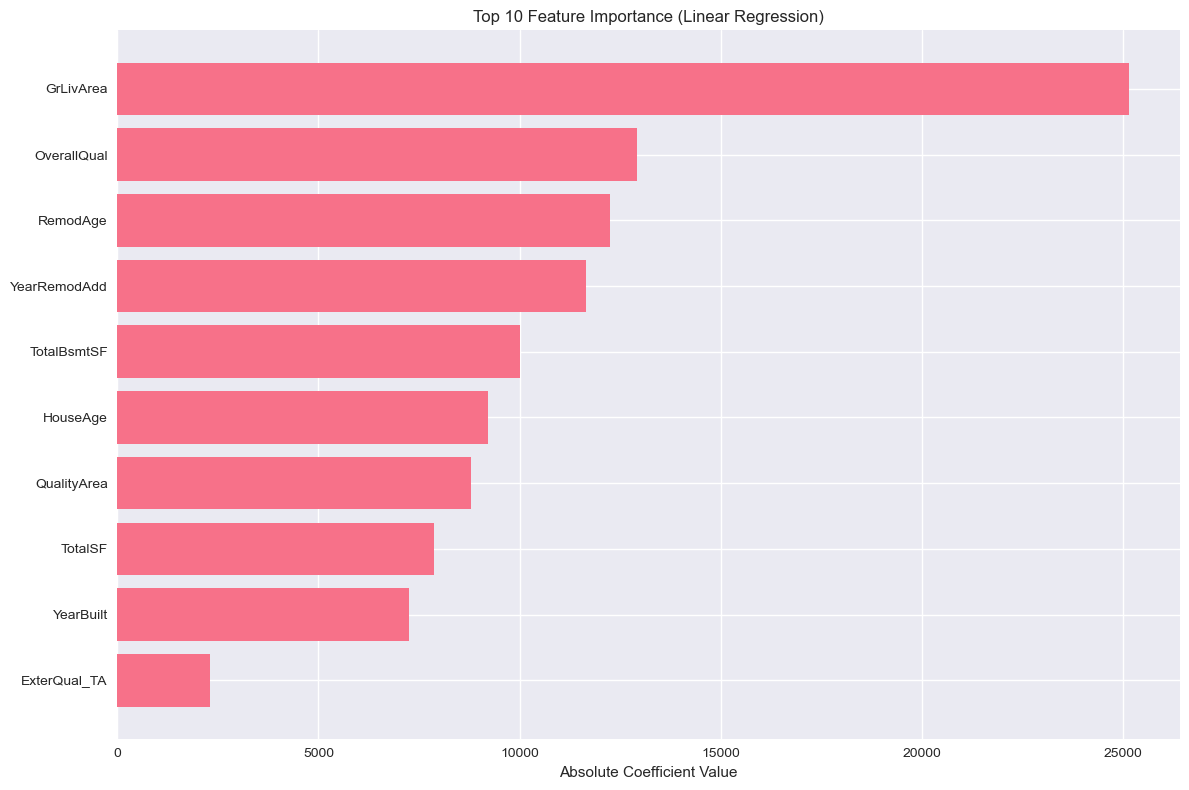

In [22]:
# Feature importance analysis
print("=== FEATURE IMPORTANCE ===")

feature_importance = pd.DataFrame({
    'feature': top_features,
    'coefficient': lr_model.coef_,
    'abs_coefficient': np.abs(lr_model.coef_)
})
feature_importance = feature_importance.sort_values('abs_coefficient', ascending=False)

print("\nTop 10 Most Important Features:")
for i, (_, row) in enumerate(feature_importance.head(10).iterrows()):
    print(f"{i+1:2d}. {row['feature']:<25} (coef: {row['coefficient']:8.2f})")

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_10_features = feature_importance.head(10)
plt.barh(range(len(top_10_features)), top_10_features['abs_coefficient'])
plt.yticks(range(len(top_10_features)), top_10_features['feature'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Top 10 Feature Importance (Linear Regression)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

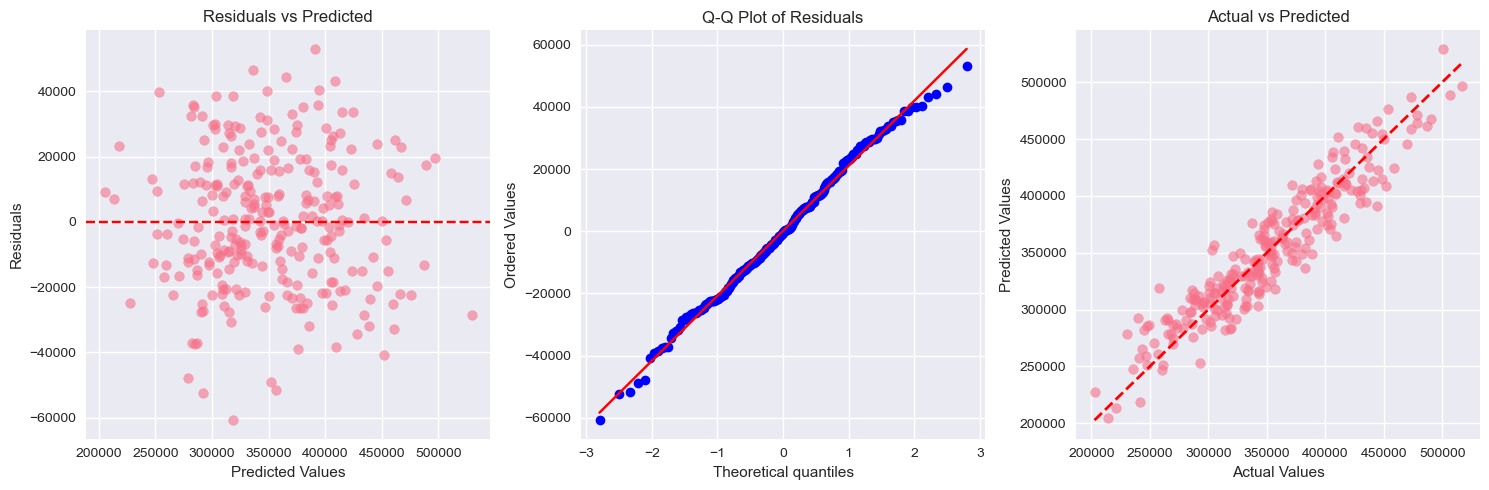

In [23]:
# Residual analysis
plt.figure(figsize=(15, 5))

# Residuals vs Predicted
plt.subplot(1, 3, 1)
residuals_test = y_test - y_test_pred
plt.scatter(y_test_pred, residuals_test, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')

# Q-Q plot of residuals
plt.subplot(1, 3, 2)
stats.probplot(residuals_test, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

# Actual vs Predicted
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')

plt.tight_layout()
plt.show()

---

## 10. Model Validation and Final Results

In [24]:
# Final model summary
print("=== FINAL MODEL SUMMARY ===")
print(f"Model: Linear Regression")
print(f"Features used: {len(top_features)}")
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")
print(f"\nFinal Performance:")
print(f"- Test RMSE: ${test_metrics['RMSE']:,.2f}")
print(f"- Test R²: {test_metrics['R2']:.4f}")
print(f"- Cross-validation RMSE: ${cv_rmse_scores.mean():,.2f} ± {cv_rmse_scores.std():,.2f}")

=== FINAL MODEL SUMMARY ===
Model: Linear Regression
Features used: 20
Training samples: 1076
Test samples: 270

Final Performance:
- Test RMSE: $20,762.25
- Test R²: 0.8817
- Cross-validation RMSE: $20,701.98 ± 603.87


In [25]:
# Prediction examples
print("\n=== PREDICTION EXAMPLES ===")
sample_indices = np.random.choice(len(X_test), 5, replace=False)

for i, idx in enumerate(sample_indices):
    actual = y_test.iloc[idx]
    predicted = y_test_pred[idx]
    error = abs(actual - predicted)
    error_pct = (error / actual) * 100
    
    print(f"\nExample {i+1}:")
    print(f"  Actual Price:    ${actual:,.0f}")
    print(f"  Predicted Price: ${predicted:,.0f}")
    print(f"  Error:           ${error:,.0f} ({error_pct:.1f}%)")


=== PREDICTION EXAMPLES ===

Example 1:
  Actual Price:    $342,630
  Predicted Price: $315,256
  Error:           $27,374 (8.0%)

Example 2:
  Actual Price:    $247,762
  Predicted Price: $285,262
  Error:           $37,500 (15.1%)

Example 3:
  Actual Price:    $327,884
  Predicted Price: $329,214
  Error:           $1,331 (0.4%)

Example 4:
  Actual Price:    $284,357
  Predicted Price: $310,249
  Error:           $25,891 (9.1%)

Example 5:
  Actual Price:    $305,157
  Predicted Price: $356,697
  Error:           $51,540 (16.9%)


---

## 11. Conclusions and Next Steps

In [26]:
print("=== MODEL CONCLUSIONS ===")
print(f"""
Key Findings:
1. The linear regression model achieved an R² score of {test_metrics['R2']:.4f}
2. The RMSE of ${test_metrics['RMSE']:,.0f} represents about {(test_metrics['RMSE']/y.mean())*100:.1f}% of the average house price
3. Most important features: {', '.join(feature_importance.head(3)['feature'].tolist())}

Model Strengths:
- Simple and interpretable
- Fast training and prediction
- Good baseline performance

Areas for Improvement:
- Try polynomial features for non-linear relationships
- Consider regularization (Ridge/Lasso regression)
- Explore ensemble methods (Random Forest, Gradient Boosting)
- Feature engineering for interaction terms
- Handle outliers more carefully

Next Steps:
1. Experiment with regularized linear models
2. Try non-linear models (Random Forest, XGBoost)
3. Hyperparameter tuning
4. More sophisticated feature engineering
5. Cross-validation with different strategies
""")

=== MODEL CONCLUSIONS ===

Key Findings:
1. The linear regression model achieved an R² score of 0.8817
2. The RMSE of $20,762 represents about 5.9% of the average house price
3. Most important features: GrLivArea, OverallQual, RemodAge

Model Strengths:
- Simple and interpretable
- Fast training and prediction
- Good baseline performance

Areas for Improvement:
- Try polynomial features for non-linear relationships
- Consider regularization (Ridge/Lasso regression)
- Explore ensemble methods (Random Forest, Gradient Boosting)
- Feature engineering for interaction terms
- Handle outliers more carefully

Next Steps:
1. Experiment with regularized linear models
2. Try non-linear models (Random Forest, XGBoost)
3. Hyperparameter tuning
4. More sophisticated feature engineering
5. Cross-validation with different strategies



---

## 12. Save Model and Results

In [27]:
# Save the trained model and preprocessing objects
import joblib

# Save model components
joblib.dump(lr_model, 'house_price_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(top_features, 'selected_features.pkl')

# Save results
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred,
    'Residual': y_test - y_test_pred
})
results_df.to_csv('model_predictions.csv', index=False)

print("Model and results saved successfully!")
print("Files saved:")
print("- house_price_model.pkl")
print("- scaler.pkl") 
print("- selected_features.pkl")
print("- model_predictions.csv")

Model and results saved successfully!
Files saved:
- house_price_model.pkl
- scaler.pkl
- selected_features.pkl
- model_predictions.csv


---

## Summary

This notebook demonstrated a complete machine learning pipeline for house price prediction:

1. **Data Exploration**: Understanding the dataset structure and target variable
2. **Feature Analysis**: Identifying important features through correlation analysis
3. **Data Cleaning**: Handling missing values and outliers
4. **Feature Engineering**: Creating new meaningful features
5. **Model Training**: Training a linear regression model with proper validation
6. **Model Evaluation**: Comprehensive evaluation using multiple metrics
7. **Model Interpretation**: Understanding feature importance and model behavior

The linear regression model provides a solid baseline with good interpretability. For production use, consider exploring more advanced models and extensive hyperparameter tuning.